<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

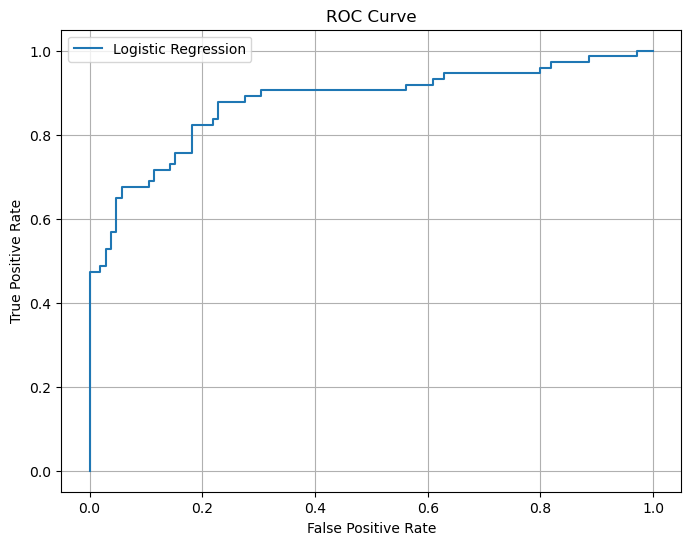

       Feature  Coefficient
2          Sex     2.597724
7     Embarked     0.222782
6         Fare     0.002901
0  PassengerId     0.000355
3          Age    -0.031155
5        Parch    -0.110668
4        SibSp    -0.294554
1       Pclass    -0.953416


In [2]:
# Logistic Regression on Titanic Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

# Display basic info
print(train_df.info())
print(train_df.describe())

# Check for missing values
print(train_df.isnull().sum())

# Fill missing values
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Drop unnecessary columns (if they exist)
columns_to_drop = ['Cabin', 'Name', 'Ticket']
existing_columns_to_drop = [col for col in columns_to_drop if col in train_df.columns]
train_df.drop(columns=existing_columns_to_drop, inplace=True)

# Convert categorical variables to numeric
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Features and target
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_prob))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Coefficients interpretation
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coefficients.sort_values(by='Coefficient', ascending=False))

# Save model
import pickle
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [4]:
import joblib

# Save model
joblib.dump(model, 'logistic_model.pkl')


['logistic_model.pkl']